In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def list_cameras():
    for i in range(5):
        camera = cv2.VideoCapture(i)
        if not camera.isOpened():
            print(i, "no camera")
        else:
            print(i, camera.getBackendName(), camera)
        camera.release()


def from_camera(n):
    cap = cv2.VideoCapture(n)
    ret, count = False, 2
    while not ret and count:
        ret, frame = cap.read()
        count -= 1
    cap.release()
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.show()
        return frame
    else:
        return None

0 MSMF <VideoCapture 000001FB1B79E4D0>
1 MSMF <VideoCapture 000001FB1344F350>
2 DSHOW <VideoCapture 000001FB1B79E4D0>
3 DSHOW <VideoCapture 000001FB1344F350>
4 no camera


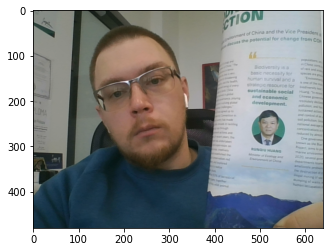

In [3]:
list_cameras()
img = from_camera(0)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# TODO: 
1. take a group photo (or zoom screenshot)
2. detect all faces. tune parameters if needed
3. crop and display faces separately
4. scale them to 64x64 size. Even if they are rectangualar. Refer to https://pythonexamples.org/python-opencv-cv2-resize-image/

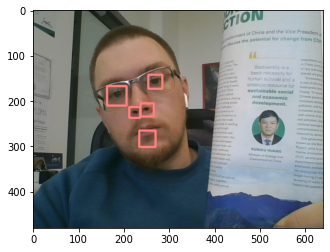

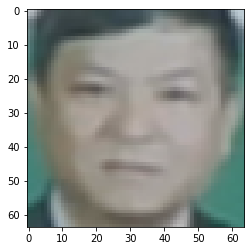

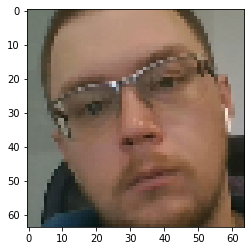

In [6]:
# this classifier detects faces
face_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_frontalface_default.xml')
# this searches for eyes
eye_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_eye.xml')
# this one works with persons in specs
specs_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_eye_tree_eyeglasses.xml')

# pyramid settings + robustness criterion (many neighbors each candidate rectangle should have to retain it)
eyes = eye_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=7,)

img_copy = img.copy()
for (x, y, w, h) in eyes:
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 128, 128), 4)

plt.imshow(img_copy)
plt.show()


# TODO detect faces here

for face in faces:
    x, y, w, h = face
    
    # TODO display and resize faces here
    
    plt.show()